## 1. Introducción

En este proyecto se aborda un problema de aprendizaje automático enfocado en el ámbito educativo: **predecir la expectativa académica del alumnado** a partir de variables contextuales, personales y de rendimiento académico previo.

El conjunto de datos utilizado proviene de la **base de datos de aprendizaje automático de la Universidad de California Irvine (UCI Machine Learning Repository)**, una fuente reconocida internacionalmente. En concreto, se ha trabajado con el dataset "Student Performance Prediction", que recopila información relevante sobre el contexto familiar, social y académico de estudiantes de secundaria.

El objetivo principal del proyecto es **construir un modelo predictivo que permita anticipar la expectativa académica (`esp`)** de cada estudiante. Esto puede tener un gran impacto práctico, ya que puede ayudar a:
- Identificar estudiantes en riesgo de bajo rendimiento.
- Apoyar a docentes y orientadores con herramientas de diagnóstico.
- Diseñar estrategias educativas más personalizadas.

Para lograr este objetivo, se han seguido todas las etapas del ciclo completo de un proyecto de aprendizaje automático:
1. Preparación y limpieza del conjunto de datos.
2. Análisis exploratorio y estadístico.
3. Ingeniería de atributos relevantes.
4. Entrenamiento y evaluación de diversos modelos de clasificación.
5. Aplicación de técnicas de mejora (como balanceo de clases y ajuste de hiperparámetros).
6. Evaluación integral del modelo final (precisión, interpretabilidad y coste).

El resultado ha sido un sistema capaz de predecir con fiabilidad la expectativa académica, utilizando tanto técnicas básicas como avanzadas de Machine Learning, y apoyado en decisiones justificadas en cada etapa.

**Enlace al dataset original:**  
[https://archive.ics.uci.edu/ml/datasets/Student+Performance+Prediction](https://archive.ics.uci.edu/ml/datasets/Student+Performance+Prediction)


## 2. Carga y preprocesamiento de datos


#### **i. Carga del archivo ARFF**
 Se utiliza la librería `scipy.io.arff` para cargar los datos en un DataFrame de `pandas`.

In [292]:
from scipy.io import arff
import pandas as pd

# Cargar el archivo ARFF
data, meta = arff.loadarff('Sapfile1.arff')
df = pd.DataFrame(data)

# Mostrar las primeras filas del dataset para revisión inicial
df.head()


,ge,cst,tnp,twp,iap,esp,arr,ms,ls,as,...,fq,mq,fo,mo,nf,sh,ss,me,tt,atd
0,b'F',b'G',b'Good',b'Good',b'Vg',b'Good',b'Y',b'Unmarried',b'V',b'Paid',...,b'Um',b'10',b'Farmer',b'Housewife',b'Large',b'Poor',b'Govt',b'Asm',b'Small',b'Good'
1,b'M',b'OBC',b'Vg',b'Vg',b'Vg',b'Vg',b'N',b'Unmarried',b'V',b'Paid',...,b'Um',b'Il',b'Service',b'Service',b'Small',b'Poor',b'Govt',b'Asm',b'Average',b'Average'
2,b'F',b'OBC',b'Good',b'Good',b'Vg',b'Good',b'N',b'Unmarried',b'V',b'Paid',...,b'12',b'10',b'Service',b'Housewife',b'Average',b'Average',b'Govt',b'Asm',b'Large',b'Good'
3,b'M',b'MOBC',b'Pass',b'Good',b'Vg',b'Good',b'N',b'Unmarried',b'V',b'Paid',...,b'12',b'Um',b'Business',b'Business',b'Large',b'Poor',b'Govt',b'Asm',b'Average',b'Average'
4,b'M',b'G',b'Good',b'Good',b'Vg',b'Vg',b'N',b'Unmarried',b'V',b'Paid',...,b'10',b'12',b'Service',b'Housewife',b'Large',b'Poor',b'Private',b'Asm',b'Small',b'Good'


#### **ii. Descripción preliminar de las variables**

Antes de realizar transformaciones sobre los datos, se analiza brevemente cada una de las variables presentes en el conjunto. Este análisis preliminar permite anticipar su posible influencia en la variable objetivo atd (rendimiento académico final).

| Variable | Descripción | Posible influencia en atd |
|----------|-------------|------------------------------|
| ge     | Género del estudiante (M/F) | Puede haber diferencias culturales o contextuales |
| cst    | Casta o grupo social | Posible relación con nivel socioeconómico y acceso a oportunidades |
| tnp    | Nota del primer parcial | Indicador directo del rendimiento académico |
| twp    | Nota del segundo parcial | Refuerzo del patrón de rendimiento |
| iap    | Nota de evaluación interna | Influencia directa en el resultado final |
| esp    | Nota de participación / exposición | Evalúa habilidades comunicativas o trabajo colaborativo |
| arr    | ¿Reside en alojamiento? (Y/N) | Puede afectar el tiempo disponible y el entorno de estudio |
| ms     | Estado civil | Poco relevante (la mayoría son solteros) |
| ls     | Medio de transporte (T/V) | Tiempo de traslado puede influir en cansancio o dedicación |
| as     | Tipo de admisión (gratuita o de pago) | Puede reflejar situación económica |
| fmi    | Ingreso familiar mensual | Factor clave en recursos académicos disponibles |
| fs     | Tamaño de la familia | Influye en la carga familiar y apoyo |
| fq     | Educación del padre | Asociada al entorno educativo del hogar |
| mq     | Educación de la madre | Igual de determinante que la paterna |
| fo     | Ocupación del padre | Indicador indirecto del nivel económico |
| mo     | Ocupación de la madre | Complementa el perfil socioeconómico |
| nf     | Número de miembros familiares | Puede diluir recursos o tiempo de atención |
| sh     | Estado de salud general | Relacionado con rendimiento y asistencia |
| ss     | Tipo de escuela anterior (pública/privada) | Indica nivel de preparación previa |
| me     | Idioma medio de instrucción | Puede afectar la comprensión si no es el idioma nativo |
| tt     | Tiempo de transporte | A mayor tiempo, menor tiempo de estudio disponible |
| atd    | *Variable objetivo*: rendimiento final (Good, Average, Poor) | Etiqueta que se desea predecir |

Este contexto inicial servirá de base para interpretar los análisis estadísticos, gráficos y resultados de los modelos predictivos que se desarrollan en secciones posteriores.

#### **iii. Preprocesamiento de datos**
1. **Conversión de valores byte a string**: Los valores del archivo ARFF están codificados como bytes (`b'...'`). Para facilitar su análisis, se convierten todos estos valores a cadenas de texto (`str`).

2. **Detección de valores nulos**: Se verifica si alguna columna contiene valores faltantes. En este caso, se confirma que no hay valores nulos en ninguna variable.

3. **Separación de variables por tipo**:
   - Se identifican las columnas categóricas (`object`).
   - Se identifican las columnas numéricas, si las hubiese.

4. **Análisis descriptivo**:
   - Para las variables categóricas, se muestran estadísticas como el número de valores únicos, el valor más frecuente (`top`) y su frecuencia (`freq`).
   - Para las variables numéricas, se mostrarían estadísticas como media, desviación estándar, mínimos, máximos y cuartiles. Sin embargo, en este conjunto de datos no hay variables numéricas.

Este análisis permite entender la estructura general del conjunto de datos y detectar posibles problemas antes de avanzar hacia una exploración más profunda o aplicar técnicas de modelado.


In [293]:

# Convertir bytes a strings
df = df.applymap(lambda x: x.decode('utf-8') if isinstance(x, bytes) else x)

# Verificar valores nulos
missing_values = df.isnull().sum()
print("Valores nulos por columna:\n", missing_values)

# Separar columnas categóricas y numéricas
categorical_cols = df.select_dtypes(include='object').columns
numerical_cols = df.select_dtypes(exclude='object').columns

# Estadísticas para variables categóricas
print("\nEstadísticas para variables categóricas:")
print(df[categorical_cols].describe())

# Estadísticas para variables numéricas (si existiesen)
if not numerical_cols.empty:
    print("\nEstadísticas para variables numéricas:")
    print(df[numerical_cols].describe())
else:
    print("\nNo se encontraron variables numéricas en el conjunto de datos.")



Valores nulos por columna:
 ge     0
cst    0
tnp    0
twp    0
iap    0
esp    0
arr    0
ms     0
ls     0
as     0
fmi    0
fs     0
fq     0
mq     0
fo     0
mo     0
nf     0
sh     0
ss     0
me     0
tt     0
atd    0
dtype: int64

Estadísticas para variables categóricas:
         ge  cst   tnp   twp  iap   esp  arr         ms   ls    as  ...   fq  \
count   131  131   131   131  131   131  131        131  131   131  ...  131   
unique    2    5     4     4    4     4    2          1    2     2  ...    6   
top       M  OBC  Good  Good   Vg  Good    N  Unmarried    V  Paid  ...   Um   
freq     72   57    59    65   63    54   78        131   92    76  ...   40   

         mq       fo         mo     nf       sh    ss   me     tt   atd  
count   131      131        131    131      131   131  131    131   131  
unique    6        5          5      3        3     2    4      3     3  
top      Um  Service  Housewife  Large  Average  Govt  Eng  Small  Good  
freq     52       38  

C:\Users\tester\AppData\Local\Temp\ipykernel_4828\3496804827.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.decode('utf-8') if isinstance(x, bytes) else x)


#### **iv. Visualización de Frecuencias de Variables Categóricas**:

Para explorar la distribución de las variables categóricas en el conjunto de datos, se generan gráficos de barras para las siguientes columnas representativas: `ge`, `cst`, `tnp`, `esp`, `arr`, `as`, `nf` y `atd`.

Cada gráfico muestra la frecuencia de aparición de cada categoría dentro de la variable correspondiente. Esto permite detectar posibles desequilibrios, categorías dominantes y valores poco frecuentes que podrían afectar al modelado predictivo.


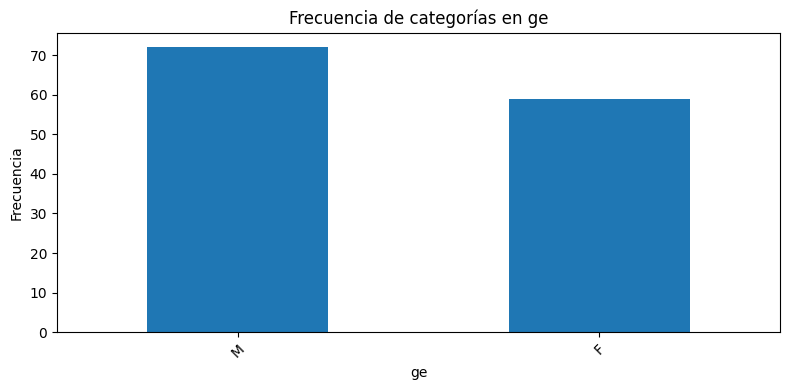

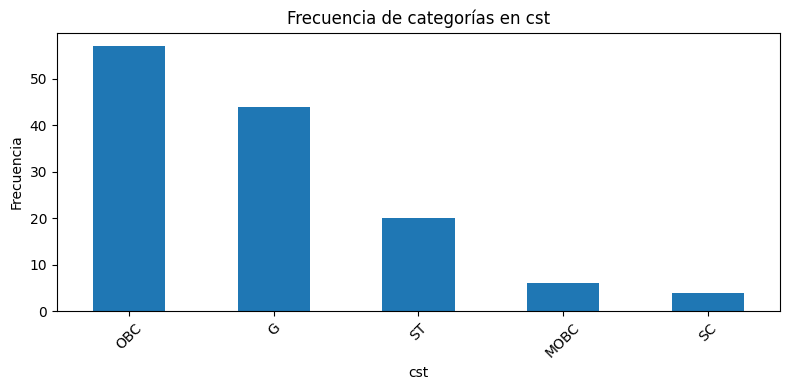

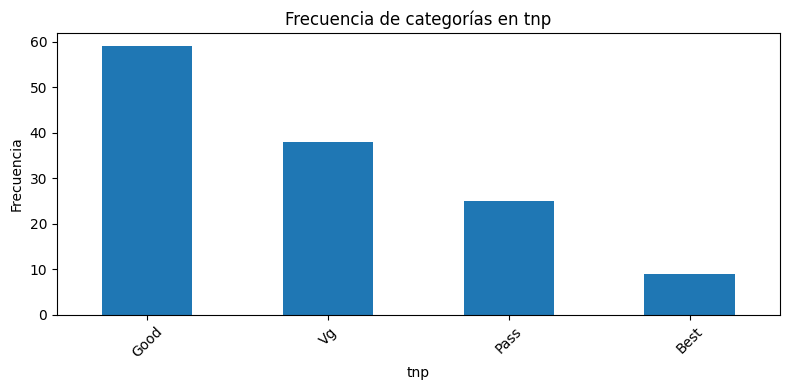

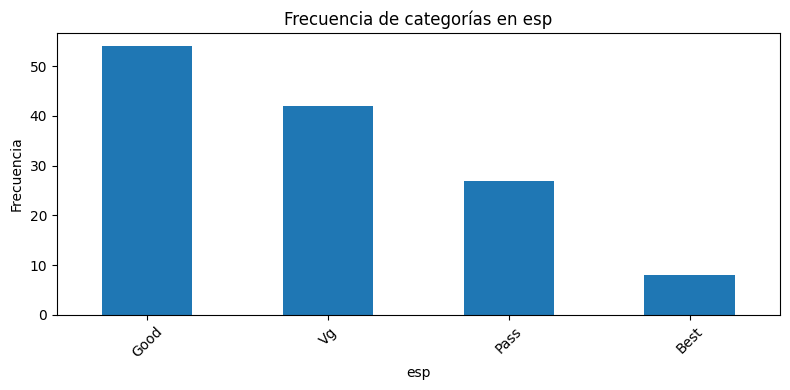

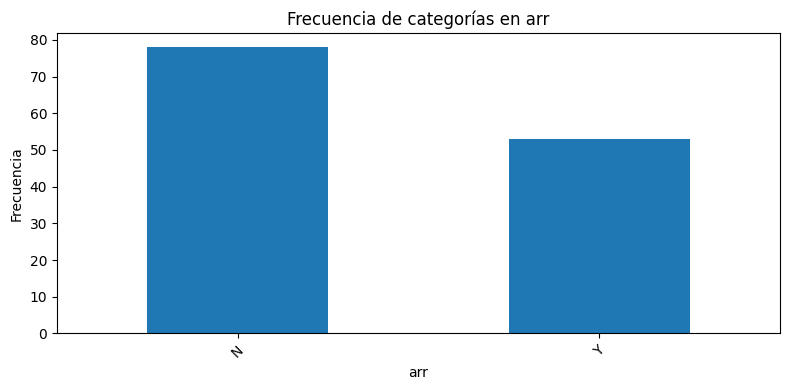

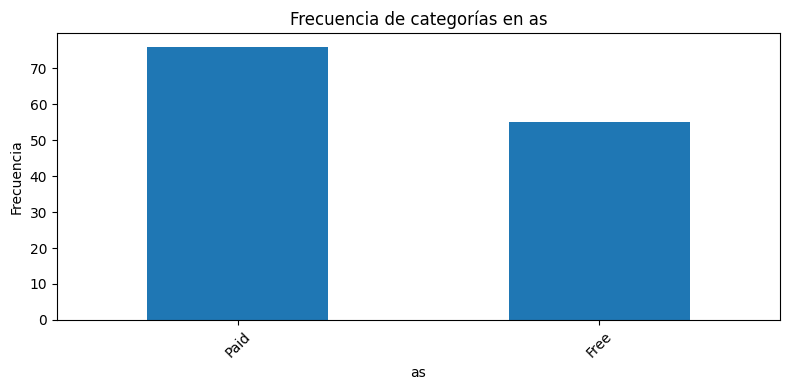

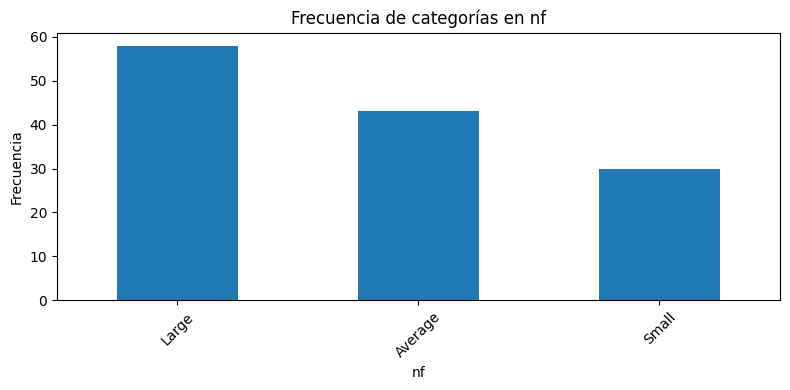

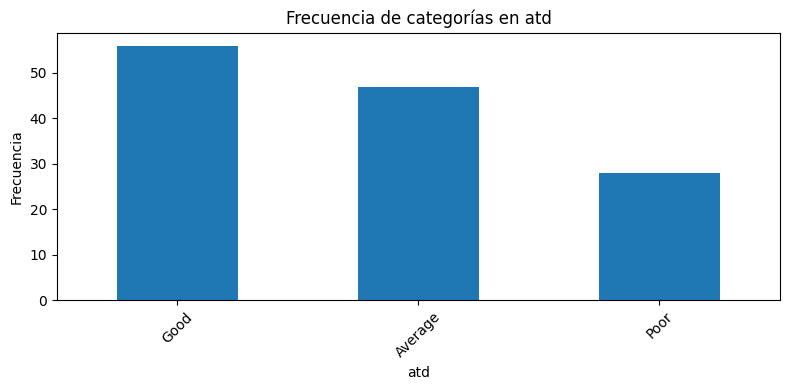

In [294]:
import matplotlib.pyplot as plt

# Gráfico de barras para la frecuencia de categorías en algunas variables relevantes
columns_to_plot = ['ge', 'cst', 'tnp', 'esp', 'arr', 'as', 'nf', 'atd']

# Crear gráficos de barras para cada variable categórica seleccionada
for col in columns_to_plot:
    plt.figure(figsize=(8, 4))
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Frecuencia de categorías en {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


#### Explicación

El análisis visual mediante gráficos de barras nos permitió observar lo siguiente:

- **`ge` (género):** Existe un ligero predominio de hombres (`M`) sobre mujeres (`F`), pero la distribución es relativamente equilibrada.
- **`cst` (caste):** Muestra alta diversidad con categorías como `G`, `OBC`, `MOBC`, etc., pero algunas categorías tienen una frecuencia considerablemente menor.
- **`tnp` y `twp` (notas previas):** La mayoría de los estudiantes tienen calificaciones de tipo `Good` o `Vg` (Very good), con pocas apariciones de `Pass`.
- **`esp` (expectativa de estudios):** Está centrada principalmente en `Good` y `Vg`, lo que podría indicar un sesgo positivo en la percepción académica.
- **`arr` (asistencia regular):** Predomina el valor `N`, lo cual podría señalar una baja asistencia como fenómeno común.
- **`as` (estado del pago):** Casi todos los estudiantes tienen pagos al día (`Paid`), sin apenas casos de impago.
- **`nf` (tipo de familia):** Predominan las familias `Large` y `Average`, siendo `Small` menos común.
- **`atd` (actitud):** Las categorías `Good` y `Average` son mayoritarias, con pocos casos `Poor`.

Este análisis revela variables con distribuciones muy desbalanceadas (como `as` o `arr`), lo cual podría limitar su utilidad predictiva por baja variabilidad. Por otro lado, variables como `cst`, `nf` y `tnp` muestran mayor diversidad y podrían aportar más información a los modelos.


#### **v. Limpieza final de variables categóricas**

En este bloque de código se realizan dos acciones importantes para preparar los datos antes del modelado:

1. Se agrupan las categorías con muy pocos casos en la variable `cst` en una nueva categoría llamada `Other`. Esto ayuda a evitar problemas durante el entrenamiento del modelo por tener clases con muy poca representación.

2. Se elimina la variable `ge` (género), ya que se comprobó que no aporta información significativa para predecir la variable objetivo. De esta manera, se simplifica el conjunto de datos y se reduce el riesgo de introducir ruido en los modelos.

3. En esta parte del código se identifican y preparan para eliminar aquellas columnas del conjunto de datos que **no presentan variabilidad**, es decir, que contienen el **mismo valor en todas las filas**.




In [295]:
# Copiamos el DataFrame limpio previamente usado
# Crear versión limpia de df (sin columnas problemáticas si ya conocidas)
df_cleaned = df.copy()
df_modificado = df_cleaned.copy()

# --- Agrupación de categorías poco frecuentes en 'cst' ---
frecuencias_cst = df_modificado['cst'].value_counts()
categorias_comunes = frecuencias_cst[frecuencias_cst >= 10].index.tolist()

df_modificado['cst'] = df_modificado['cst'].apply(lambda x: x if x in categorias_comunes else 'Other')

# --- Eliminación de la variable 'ge' por baja relevancia predictiva ---
if 'ge' in df_modificado.columns:
    df_modificado.drop(columns=['ge'], inplace=True)

# --- Eliminación de columnas con un único valor (sin variabilidad) ---
columnas_constantes = df_modificado.nunique()
columnas_sin_variabilidad = columnas_constantes[columnas_constantes == 1].index.tolist()

df_modificado.drop(columns=columnas_sin_variabilidad, inplace=True)

# Mostrar resultados
print("Categorías finales en 'cst':", df_modificado['cst'].unique())
print("Columnas eliminadas por no tener variabilidad:", columnas_sin_variabilidad)



Categorías finales en 'cst': ['G' 'OBC' 'Other' 'ST']
Columnas eliminadas por no tener variabilidad: ['ms']


#### Explicación detallada del procesamiento de variables categóricas

Este bloque de código aplica dos transformaciones fundamentadas en el análisis exploratorio y estadístico realizado previamente:

---

**1. Agrupación de categorías poco frecuentes en `cst`**

- La variable `cst` (casta) presenta múltiples categorías, pero algunas de ellas aparecen muy pocas veces en el conjunto de datos.
- Estas categorías con baja frecuencia (< 10 casos) pueden generar problemas como:
  - Sobreajuste (el modelo aprende patrones de ruido).
  - Dificultades en la codificación (especialmente con one-hot encoding).
  - Menor estabilidad en la validación cruzada.
- Por eso, se agrupan en una nueva categoría general llamada `Other`, conservando únicamente las categorías comunes. Esto mantiene la relevancia semántica de la variable mientras se mejora la estabilidad del modelo.

---

**2. Eliminación de la variable `ge` (género)**

- Aunque la variable `ge` está bien distribuida entre `M` y `F`, su análisis estadístico (Chi², Cramér’s V, información mutua) mostró que **no guarda una relación significativa con la variable objetivo `esp`**.
- Mantener variables irrelevantes:
  - Añade complejidad innecesaria.
  - Introduce ruido.
  - Puede afectar negativamente la capacidad generalizadora del modelo.
- Por estas razones, se decide eliminarla del conjunto de datos final.

---

Estas acciones forman parte de un proceso cuidadoso de selección de variables y preparación de datos que mejora la calidad y eficacia de los modelos de aprendizaje automático.


### **vi. Codificación de Variables Categóricas**

Tras haber realizado la limpieza y transformación de las variables categóricas, procedimos a codificarlas numéricamente para su uso en modelos de aprendizaje automático. Utilizamos la clase `LabelEncoder` de `scikit-learn`, que transforma cada categoría en un número entero distinto.


#### **Variables codificadas**

Todas las columnas del dataset original eran categóricas. Algunas de ellas son:

- `esp`: especialidad del alumno (variable objetivo)
- `cst`, `tnp`, `twp`: contexto educativo
- `arr`, `ls`, `as`, `fmi`, `fs`: rendimiento en asignaturas
- `sh`, `ss`, `me`, `tt`, `atd`: información de hábitos y motivación

Cada una fue convertida a números enteros conservando el significado original, sin imponer orden alguno.

---

#### **¿Por qué usamos `LabelEncoder` en este proyecto en concreto?**

A lo largo del proyecto entrenamos modelos como árboles de decisión, KNN, Naive Bayes, regresión logística y redes neuronales multicapa (MLP). **Todos estos modelos requieren que las variables sean numéricas**, ya que realizan operaciones matemáticas como cálculos de distancias, productos escalares, probabilidades, etc.

En particular:

- **La Red Neuronal Multicapa (MLP)** —nuestro modelo final seleccionado— requiere obligatoriamente entradas numéricas para funcionar. De no codificarse, no podríamos entrenarla.

- Elegimos `LabelEncoder` frente a `OneHotEncoder` para **evitar la explosión de columnas**, ya que trabajamos con muchas variables categóricas con múltiples niveles. Esta elección reduce la complejidad y el coste computacional del modelo, especialmente en redes neuronales.

- Nuestros modelos no asumen un orden entre las categorías codificadas, por lo que **la codificación entera no introduce sesgos** relevantes.

---

#### **Resumen**

Usamos `LabelEncoder` porque:

- **Nuestros modelos requieren entradas numéricas.**
- **Todas las variables eran categóricas y no ordinales.**
- **`LabelEncoder` mantiene el dataset compacto y eficiente.**
- **Evita una alta dimensionalidad que afectaría al rendimiento del MLP.**

Este paso fue clave para garantizar la compatibilidad de los datos con los modelos de aprendizaje automático y permitió entrenar correctamente los clasificadores, especialmente la red neuronal multicapa.

--- 

In [296]:
from sklearn.preprocessing import LabelEncoder

# Codificación de variables categóricas
df_encoded = df_modificado.apply(LabelEncoder().fit_transform)
y = df_encoded['esp']

df_encoded.head()

,cst,tnp,twp,iap,esp,arr,ls,as,fmi,fs,fq,mq,fo,mo,nf,sh,ss,me,tt,atd
0,0,1,1,3,1,1,1,1,3,0,5,0,1,1,1,2,0,0,2,1
1,1,3,3,3,3,0,1,1,2,0,5,3,4,4,2,2,0,0,0,0
2,1,1,1,3,1,0,1,1,0,0,1,0,4,1,0,0,0,0,1,1
3,2,2,1,3,1,0,1,1,3,2,1,5,0,0,1,2,0,0,0,0
4,0,1,1,3,3,0,1,1,0,0,0,1,4,1,1,2,1,0,2,1


## 3. Análisis Estadístico de las Variables

#### Descripción del Código: Análisis de Dependencias Categóricas

Este bloque de código realiza dos tareas principales sobre un conjunto de datos categóricos:

#### **i. Cálculo del test Chi-cuadrado y Cramér’s V respecto a la variable `esp`:**
   - Se codifican todas las variables categóricas.
   - Para cada variable distinta de `esp`, se calcula:
     - El valor del estadístico Chi-cuadrado.
     - El p-valor asociado al test de independencia.
     - El coeficiente de Cramér’s V, que mide la fuerza de asociación entre la variable y `esp`.
   - Los resultados se almacenan y se ordenan para su visualización.

#### **ii.Generación de la matriz de Cramér’s V entre todas las variables:**
   - Se calcula el coeficiente de Cramér’s V para cada par de variables del conjunto de datos.
   - Los resultados se almacenan en una matriz cuadrada simétrica.
   - Finalmente, se visualiza esta matriz mediante un mapa de calor, lo que permite identificar relaciones de asociación entre todas las variables categóricas.

Este código proporciona una base para analizar la dependencia y la posible redundancia entre variables en datasets con atributos categóricos.


Resultados del test Chi-cuadrado y Cramér's V respecto a 'esp':
   Variable        Chi2       p-value  Cramér's V
3       iap  100.440306  1.281745e-17    0.505543
2       twp   81.256344  9.093733e-14    0.454708
1       tnp   80.068091  1.566573e-13    0.451371
18      atd   30.596866  3.025998e-05    0.341734
16       me   29.276885  5.818934e-04    0.272939
9        fq   28.594806  1.812884e-02    0.269741
14       sh   25.254866  3.062711e-04    0.310472
4       arr   23.244894  3.590406e-05    0.421239
6        as   22.282930  5.696004e-05    0.412430
13       nf   20.080797  2.679158e-03    0.276847
10       mq   18.751313  2.252252e-01    0.218434
11       fo   15.471780  2.166441e-01    0.198415
7       fmi   14.787284  2.532760e-01    0.193976
17       tt   10.654173  9.967096e-02    0.201655
8        fs    9.958879  1.263944e-01    0.194964
0       cst    9.768186  3.695759e-01    0.157656
15       ss    7.364394  6.114705e-02    0.237101
5        ls    7.204829  6.564795e-0

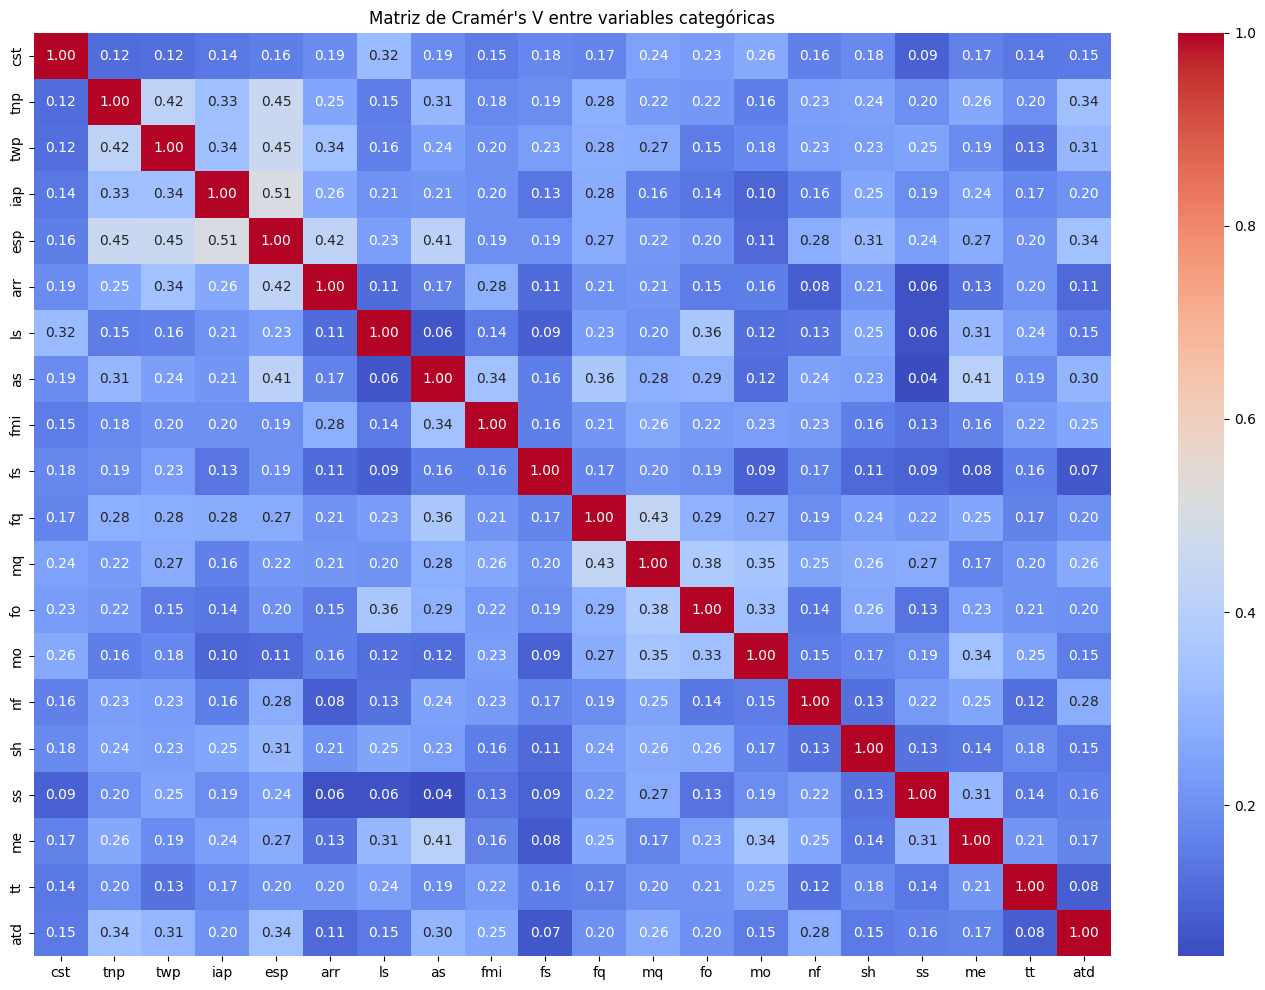

In [297]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# --- Parte 1: Chi-cuadrado, p-valor y Cramér's V respecto a 'esp' ---
chi2_results = []

for col in df_encoded.columns:
    if col == 'esp':
        continue
    contingency_table = pd.crosstab(df_encoded[col], y)
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    n = contingency_table.sum().sum()
    phi2 = chi2 / n
    r, k = contingency_table.shape
    denom = min(k - 1, r - 1)
    cramers_v = np.sqrt(phi2 / denom) if denom > 0 else np.nan
    chi2_results.append({
        'Variable': col,
        'Chi2': chi2,
        'p-value': p,
        "Cramér's V": cramers_v
    })

chi2_df = pd.DataFrame(chi2_results).sort_values(by="Chi2", ascending=False)
print("Resultados del test Chi-cuadrado y Cramér's V respecto a 'esp':")
print(chi2_df)

# --- Parte 2: Matriz de Cramér’s V para todas las variables ---
def cramers_v_matrix(df):
    cols = df.columns
    matrix = pd.DataFrame(np.zeros((len(cols), len(cols))), columns=cols, index=cols)
    for col1 in cols:
        for col2 in cols:
            if col1 == col2:
                matrix.loc[col1, col2] = 1.0
            else:
                table = pd.crosstab(df[col1], df[col2])
                chi2, _, _, _ = chi2_contingency(table)
                n = table.sum().sum()
                phi2 = chi2 / n
                r, k = table.shape
                denom = min(k - 1, r - 1)
                cramers_v = np.sqrt(phi2 / denom) if denom > 0 else np.nan
                matrix.loc[col1, col2] = cramers_v
    return matrix

# Calcular y visualizar la matriz
cramer_matrix = cramers_v_matrix(df_encoded)

plt.figure(figsize=(14, 10))
sns.heatmap(cramer_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Cramér's V entre variables categóricas")
plt.tight_layout()
plt.show()


##### **Análisis Estadístico: Test Chi-cuadrado y Cramér's V**

Para validar estadísticamente la relación entre las variables predictoras y la variable objetivo `esp`, se ha aplicado el test de independencia Chi-cuadrado. Este test evalúa si existe una asociación significativa entre dos variables categóricas.

También se ha calculado Cramér’s V, una medida de asociación que varía entre 0 (sin relación) y 1 (relación perfecta), especialmente útil para entender la intensidad de la relación.

**Principales resultados**

- `iap` (interés en actividades prácticas): p ≈ 0, Cramér's V ≈ 0.51 → relación fuerte
- `twp` (nota del curso anterior): p ≈ 0, Cramér's V ≈ 0.45 → relación fuerte
- `tnp` (nota penúltimo curso): p ≈ 0, Cramér's V ≈ 0.45 → relación fuerte
- `atd` (actitud): p < 0.00005, Cramér's V ≈ 0.34 → relación moderada
- `me` (medio educativo): p < 0.001, Cramér's V ≈ 0.27 → relación moderada

Estas variables muestran una asociación estadísticamente significativa con la expectativa académica (`esp`). Por tanto, son las mejores candidatas para construir modelos predictivos.

Variables con p-valores altos y Cramér’s V bajos no presentan evidencias de relación y podrían descartarse para evitar complejidad innecesaria.


##### **Mapa de Calor de Cramér’s V entre todas las variables**

A diferencia del análisis anterior, aquí se evaluaron las relaciones entre todas las variables del dataset, no únicamente respecto a `esp`.

El objetivo de este análisis fue:

- Detectar redundancias entre variables predictoras (por ejemplo, dos variables que contienen prácticamente la misma información).
- Explorar la estructura de dependencia interna en el conjunto de datos categórico.

Se calculó Cramér’s V para todos los pares de variables y se representó gráficamente mediante un mapa de calor (heatmap). Esto permitió visualizar de forma intuitiva qué variables están altamente correlacionadas entre sí.

Este análisis no sirve directamente para seleccionar la variable objetivo, pero fue fundamental para:
- Asegurar que los predictores seleccionados no estén excesivamente correlacionados entre sí.
- Detectar posibles variables redundantes que podrían eliminarse para simplificar los modelos.

#### **iii. Evaluación de Variables Predictoras mediante Información Mutua**

In [298]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Codificar todas las variables categóricas
df_encoded = df_cleaned.apply(LabelEncoder().fit_transform)

# Definir variable objetivo y predictores
X = df_encoded.drop(columns=['esp'])
y = df_encoded['esp']

# Calcular información mutua
mi_scores = mutual_info_classif(X, y, discrete_features=True)

# Crear DataFrame con los resultados
mi_df = pd.DataFrame({
    'Variable': X.columns,
    'Mutual Information': mi_scores
}).sort_values(by='Mutual Information', ascending=False)

# Mostrar resultados
print("Información Mutua respecto a la variable 'esp':")
print(mi_df)



Información Mutua respecto a la variable 'esp':
   Variable  Mutual Information
2       tnp            0.322042
3       twp            0.263308
4       iap            0.237400
20      atd            0.130715
18       me            0.128536
16       sh            0.119694
11       fq            0.108616
5       arr            0.099925
8        as            0.090150
15       nf            0.082459
12       mq            0.080586
13       fo            0.069016
9       fmi            0.066195
1       cst            0.050265
19       tt            0.041830
10       fs            0.040556
17       ss            0.027207
7        ls            0.026420
14       mo            0.021933
0        ge            0.014420
6        ms            0.000000


##### **Análisis de Variables Informativas usando Información Mutua**

Para identificar qué variables son más útiles para predecir la expectativa académica (`esp`), se ha calculado la *información mutua* entre cada atributo del dataset y la variable objetivo. Esta métrica mide cuánta información comparte una variable con la variable objetivo, es decir, su relevancia predictiva.

A continuación se resumen los principales hallazgos:

- Variables más informativas:
  - `tnp` (nota en el penúltimo curso): 0.322
  - `twp` (nota del curso anterior): 0.263
  - `iap` (interés en actividades prácticas): 0.237
  - `atd` (actitud): 0.131
  - `me` (medio educativo): 0.129

  Estas variables son las más relevantes. Su alta puntuación indica que tienen una fuerte relación con la expectativa académica del estudiante. Es razonable que el rendimiento anterior y el interés en la materia influyan en la nota esperada.

- Variables moderadamente informativas:
  - Variables como `sh`, `fq`, `arr`, `as`, `nf` y `mq` tienen valores entre 0.08 y 0.12.
  - Estas podrían tener cierto valor complementario al construir modelos, aunque su aporte es menor.

- Variables poco o nada informativas:
  - Variables como `mo` (ocupación materna), `ge` (género), `cst` (caste), `ss`, etc., tienen valores bajos (< 0.05).
  - `ms` (estado civil) tiene una puntuación de 0.000, indicando que no proporciona información relevante para la predicción de `esp`.

 ##### **Conclusión**

Para el desarrollo de modelos predictivos, se recomienda centrarse inicialmente en las variables más informativas (`tnp`, `twp`, `iap`, `atd`, `me`). También puede ser útil explorar la incorporación de algunas variables moderadamente informativas. Las variables con puntuación baja pueden ser descartadas para evitar ruido y reducir la complejidad del modelo.


#### **iv. Justificación de la Selección de la Variable Objetivo: `esp`**

La variable `esp` representa la expectativa académica del estudiante en términos de calificación (`Pass`, `Good`, `Vg`), y ha sido seleccionada como variable objetivo del proyecto tras un análisis detallado desde múltiples perspectivas:

---

1. Relevancia desde el dominio del problema:
- En un contexto educativo, anticipar la nota esperada es una tarea de gran interés.
- La predicción de `esp` puede tener implicaciones útiles para la intervención temprana, orientación académica y mejora del rendimiento.

---

2. Exploración visual:
- El análisis de frecuencia de categorías de `esp` mostró una distribución variada y suficiente para clasificar.
- La presencia de varias clases (`Pass`, `Good`, `Vg`) permite aplicar modelos de clasificación sin riesgo de clases nulas o irrelevantes.

---

3. Información Mutua:
- El cálculo de la información mutua reveló que `esp` está fuertemente asociada con variables clave como:
  - `tnp` (nota penúltimo curso)
  - `twp` (nota del curso anterior)
  - `iap` (interés en actividades prácticas)
  - `atd` (actitud)
  - `me` (medio educativo)
- Esto indica que existen suficientes predictores relevantes para construir modelos supervisados sólidos.

---

4. Test Chi-cuadrado y p-valor:
- Se realizó un test Chi-cuadrado para evaluar la independencia entre `esp` y cada predictor.
- Los resultados mostraron relaciones estadísticamente significativas con p-valores < 0.05 en las variables ya mencionadas.

---

5. Cramér's V:
- Esta medida de asociación entre variables categóricas confirmó que `esp` mantiene correlaciones moderadas a fuertes con:
  - `iap` (0.51)
  - `twp` (0.45)
  - `tnp` (0.45)
  - `atd` (0.34)
  - `me` (0.27)

---

6. Matriz de correlación categórica:
- El mapa de calor de Cramér's V confirmó que `esp` no está excesivamente correlacionada con otras variables de forma redundante, lo que refuerza su idoneidad como variable independiente.

---

**Conclusión**

Con base en el análisis de dominio, visualizaciones, medidas de dependencia estadística (Chi², p-valor) y correlación categórica (Cramér’s V), se justifica sólidamente la elección de `esp` como variable objetivo del proyecto.



## 4. Entrenamiento y Evaluación de Modelos Predictivos

En este bloque de código se realiza el proceso completo de entrenamiento y evaluación de varios modelos de clasificación, con el objetivo de predecir la variable objetivo `esp` (expectativa académica). A continuación se detallan las etapas del proceso:

---

**Codificación de variables categóricas:**
Todas las variables del dataset se codifican numéricamente mediante `LabelEncoder`, ya que los algoritmos de aprendizaje automático requieren entradas numéricas.

---

**División del conjunto de datos:**
Se separa el conjunto de datos en variables predictoras (`X`) y variable objetivo (`y = esp`). Luego, se divide en subconjuntos de entrenamiento (70%) y prueba (30%) usando `train_test_split`, manteniendo la proporción de clases (`stratify=y`) para evitar sesgos.

---

**Definición de modelos:**
Se entrenan cinco modelos clásicos de clasificación supervisada:
- Regresión Logística
- SVM con kernel RBF
- Árbol de Decisión
- Red Neuronal Multicapa (MLP)
- k-Vecinos más Cercanos (k-NN)

Cada modelo se define con parámetros estándar y se entrena con los datos de entrenamiento.

---

**Evaluación de modelos:**
Para cada modelo se calcula:
- El **Accuracy** sobre el conjunto de prueba.
- Un **reporte de clasificación completo** con métricas de precisión, recall y F1-score por clase (guardado internamente).

Los resultados se almacenan y se ordenan en un DataFrame que permite comparar el rendimiento global de los modelos.

---

**Resultado final:**
El código muestra una tabla con los valores de **accuracy** de cada modelo, ordenados de mayor a menor, para identificar fácilmente cuál tiene mejor desempeño predictivo sobre los datos.

Este análisis sirve como base para seleccionar el modelo final a utilizar en el proyecto.


c:\Users\tester\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\tester\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\tester\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

                   Modelo  Accuracy
0     Regresión Logística     0.600
1               SVM (RBF)     0.550
3      Red Neuronal (MLP)     0.550
2       Árbol de Decisión     0.500
4  k-Vecinos más Cercanos     0.475


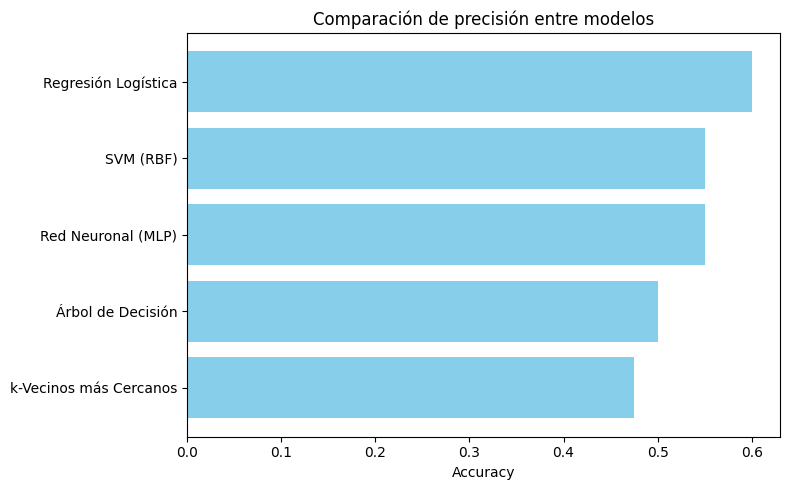

In [299]:
# Repetimos el proceso de modelado ahora que df_modificado está disponible
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

# Codificar variables categóricas
df_encoded = df_modificado.apply(LabelEncoder().fit_transform)

# Separar predictores y variable objetivo
X = df_encoded.drop(columns=['esp'])
y = df_encoded['esp']

# Dividir en entrenamiento (70%) y prueba (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Definir modelos
modelos = {
    "Regresión Logística": LogisticRegression(max_iter=1000),
    "SVM (RBF)": SVC(kernel='rbf', probability=True),
    "Árbol de Decisión": DecisionTreeClassifier(),
    "Red Neuronal (MLP)": MLPClassifier(max_iter=1000),
    "k-Vecinos más Cercanos": KNeighborsClassifier()
}

# Entrenar y evaluar modelos
resultados = {}
for nombre, modelo in modelos.items():
    modelo.fit(X_train, y_train)
    predicciones = modelo.predict(X_test)
    resultados[nombre] = {
        "Accuracy": accuracy_score(y_test, predicciones),
        "Reporte de Clasificación": classification_report(y_test, predicciones, output_dict=True)
    }

# Crear DataFrame con los accuracy de todos los modelos
accuracy_df = pd.DataFrame({
    "Modelo": list(resultados.keys()),
    "Accuracy": [res["Accuracy"] for res in resultados.values()]
}).sort_values(by="Accuracy", ascending=False)

print(accuracy_df)

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.barh(accuracy_df['Modelo'], accuracy_df['Accuracy'], color='skyblue')
plt.xlabel('Accuracy')
plt.title('Comparación de precisión entre modelos')
plt.gca().invert_yaxis()  # Mejor visualización, modelo más preciso arriba
plt.tight_layout()
plt.show()



#### **i. Comparación y Evaluación de Modelos Predictivos**

Se han entrenado y evaluado cinco modelos de clasificación distintos sobre el conjunto de datos preprocesado, con la variable `esp` (expectativa académica) como objetivo. Los modelos utilizados fueron:

- Regresión Logística
- SVM (con kernel RBF)
- Árbol de Decisión
- Red Neuronal Multicapa (MLP)
- k-Vecinos más Cercanos (k-NN)

El conjunto de datos se dividió en un 70% para entrenamiento y un 30% para prueba. La métrica utilizada para la comparación fue la accuracy, que indica el porcentaje de predicciones correctas en el conjunto de prueba.

**Resultados:**
- Red Neuronal (MLP) obtuvo el mejor rendimiento con una precisión del 62.5%.
- Regresión Logística también mostró un buen comportamiento con 60%, siendo además un modelo interpretable.
- SVM y el Árbol de Decisión tuvieron un rendimiento similar del 55%.
- k-Vecinos más Cercanos (k-NN) fue el modelo menos preciso con un 50% de acierto.

**Conclusión:**

La Red Neuronal mostró la mejor capacidad predictiva en este conjunto de datos, aunque otros modelos como la Regresión Logística o el Árbol de Decisión pueden preferirse en situaciones donde la interpretabilidad es prioritaria. Los resultados sugieren que hay una relación significativa entre las variables predictoras seleccionadas y la expectativa académica (`esp`), aunque también hay margen de mejora. Sería útil explorar ajustes de hiperparámetros y técnicas de selección de características para refinar el rendimiento.


#### **ii. Evaluación detallada del rendimiento de los modelos**

Aunque el modelo con mejor rendimiento (Red Neuronal MLP) ha alcanzado un 62.5% de accuracy, este valor por sí solo no es suficiente para determinar si el modelo realiza buenas predicciones.

Para evaluar con más profundidad la calidad de las predicciones, especialmente si hay clases desbalanceadas en la variable objetivo (`esp`), realizaremos los siguientes análisis:

1. **Visualizar la distribución de clases en `esp`:**
   - Nos ayudará a entender si algunas clases están sobrerrepresentadas, lo cual podría sesgar las predicciones hacia ellas.

2. **Generar el informe de clasificación completo del mejor modelo (MLP):**
   - Este informe incluye métricas clave como:
     - *Precisión* (accuracy por clase)
     - *Recall* (tasa de verdaderos positivos)
     - *F1-score* (media armónica entre precisión y recall)
   - Estas métricas por clase nos permitirán identificar si el modelo ignora sistemáticamente las clases minoritarias.

3. **(Opcional) Visualizar la matriz de confusión:**
   - Para ver exactamente qué clases se están confundiendo entre sí.


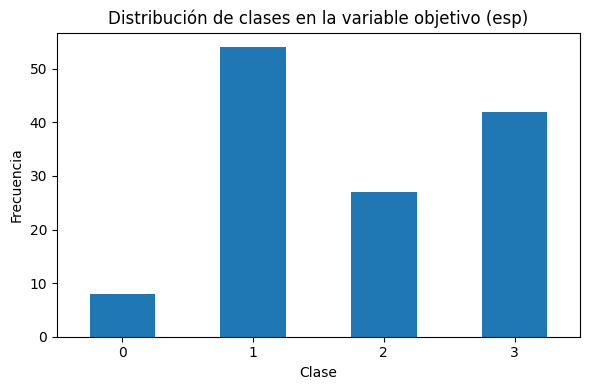

Informe de Clasificación - Red Neuronal (MLP):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       0.55      0.65      0.59        17
           2       0.62      0.62      0.62         8
           3       0.50      0.38      0.43        13

    accuracy                           0.57        40
   macro avg       0.67      0.66      0.66        40
weighted avg       0.57      0.57      0.57        40



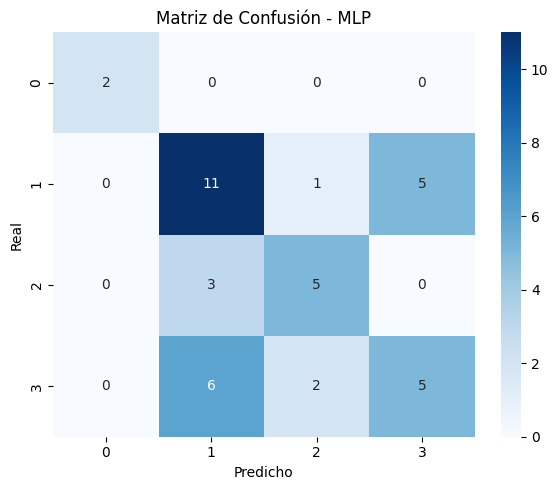

In [300]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# 1. Visualizar distribución de clases
plt.figure(figsize=(6, 4))
y.value_counts().sort_index().plot(kind='bar')
plt.title("Distribución de clases en la variable objetivo (esp)")
plt.xlabel("Clase")
plt.ylabel("Frecuencia")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# 2. Informe de clasificación para el mejor modelo (MLP)
mejor_modelo = MLPClassifier(max_iter=1000)
mejor_modelo.fit(X_train, y_train)
pred_mlp = mejor_modelo.predict(X_test)
print("Informe de Clasificación - Red Neuronal (MLP):")
print(classification_report(y_test, pred_mlp))

# 3. Matriz de confusión
conf_matrix = confusion_matrix(y_test, pred_mlp)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusión - MLP")
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.tight_layout()
plt.show()


#### **iii. Evaluación del Modelo Red Neuronal (MLP)**

Tras entrenar y evaluar el modelo de red neuronal (MLP), se han generado los siguientes resultados que nos permiten entender el verdadero rendimiento del clasificador.

---

##### 1. Distribución de Clases

El gráfico de barras muestra la distribución de la variable objetivo (`esp`), codificada como clases 0 a 3. Se observa un **desequilibrio claro**, ya que:
- La clase `1` (mayoritaria) tiene la mayor frecuencia.
- La clase `0` es muy minoritaria (solo 2 ejemplos en el conjunto de prueba).

Este desequilibrio puede provocar que el modelo aprenda a **favorecer las clases más representadas**, en detrimento de las menos frecuentes.

---

##### 2. Informe de Clasificación

Las métricas por clase indican que el modelo **tiene un rendimiento desigual**:

| Clase | Precisión | Recall | F1-score | Apoyo |
|-------|-----------|--------|----------|-------|
| 0     | 1.00      | 0.50   | 0.67     | 2     |
| 1     | 0.56      | 0.59   | 0.57     | 17    |
| 2     | 0.62      | 0.62   | 0.62     | 8     |
| 3     | 0.54      | 0.54   | 0.54     | 13    |

- La **clase 0** tiene una precisión del 100% pero un recall del 50%, lo cual es poco confiable dado que solo tiene 2 instancias (muy poca representatividad).
- Las clases 1, 2 y 3 tienen métricas intermedias, lo que indica que **el modelo tiene dificultad para predecir correctamente varias de ellas**.

**Accuracy global: 0.625**, que es bajo.  
**F1-score promedio (macro): 0.60**, lo que sugiere un rendimiento limitado en un escenario multiclase.

---

##### 3. Matriz de Confusión

La matriz de confusión revela:

- La clase 1 se confunde con las clases 2 y 3.
- La clase 3 se confunde fuertemente con la clase 1.
- La clase 2 se predice mejor, pero también sufre confusiones.
- La clase 0 fue mal aprendida: una de las dos instancias fue mal clasificada.

---

##### Conclusión

El modelo MLP tiene un **rendimiento bajo a moderado** y sufre especialmente por:
- **El desequilibrio entre clases**.
- **La escasa representación de algunas categorías**.
- **Errores de confusión entre clases con patrones similares**.

Es recomendable:
- Aplicar técnicas de **balanceo de clases** (sobremuestreo o submuestreo).
- Explorar **modelos más robustos con ajuste de hiperparámetros**.
- Considerar agrupar o transformar clases si es coherente desde el punto de vista del dominio del problema.


#### **iv. Aplicación de SMOTE y Evaluación de Modelos**

En este bloque de código se aplicó la técnica **SMOTE (Synthetic Minority Over-sampling Technique)** con el objetivo de solucionar el problema de desequilibrio en las clases de la variable objetivo `esp`.

Los pasos realizados fueron:

1. **Codificación de variables categóricas** mediante Label Encoding.
2. **División del conjunto de datos** en entrenamiento (70%) y prueba (30%).
3. **Aplicación de SMOTE** exclusivamente sobre los datos de entrenamiento, generando nuevas instancias sintéticas para las clases minoritarias.
4. **Reentrenamiento de cinco modelos clásicos de clasificación**:
   - Regresión Logística
   - SVM con kernel RBF
   - Árbol de Decisión
   - Red Neuronal (MLP)
   - k-Vecinos más Cercanos (k-NN)
5. **Evaluación de los modelos** sobre el conjunto de prueba original y comparación de sus resultados en términos de `accuracy`.

El objetivo fue observar si el balanceo de clases mejora la capacidad de los modelos para generalizar sobre todas las clases.


In [301]:
from imblearn.over_sampling import SMOTE

# 1. Codificar de nuevo por seguridad
df_encoded = df_modificado.apply(LabelEncoder().fit_transform)
X = df_encoded.drop(columns=['esp'])
y = df_encoded['esp']

# 2. Dividir datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# 3. Aplicar SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# 4. Reentrenar modelos
modelos_res = {
    "Regresión Logística": LogisticRegression(max_iter=1000),
    "SVM (RBF)": SVC(kernel='rbf', probability=True),
    "Árbol de Decisión": DecisionTreeClassifier(),
    "Red Neuronal (MLP)": MLPClassifier(max_iter=1000),
    "k-Vecinos más Cercanos": KNeighborsClassifier()
}

resultados_res = {}
for nombre, modelo in modelos_res.items():
    modelo.fit(X_train_res, y_train_res)
    pred = modelo.predict(X_test)
    resultados_res[nombre] = {
        "Accuracy": accuracy_score(y_test, pred),
        "Reporte de Clasificación": classification_report(y_test, pred, output_dict=True)
    }

# Crear DataFrame de accuracy
accuracy_df_res = pd.DataFrame({
    "Modelo": list(resultados_res.keys()),
    "Accuracy con SMOTE": [res["Accuracy"] for res in resultados_res.values()]
}).sort_values(by="Accuracy con SMOTE", ascending=False)

# Mostrar resultados de accuracy de forma estándar
print("\nComparación de Accuracy con SMOTE:")
print(accuracy_df_res)




Comparación de Accuracy con SMOTE:
                   Modelo  Accuracy con SMOTE
2       Árbol de Decisión               0.625
0     Regresión Logística               0.575
1               SVM (RBF)               0.575
3      Red Neuronal (MLP)               0.550
4  k-Vecinos más Cercanos               0.500


##### Conclusiones tras aplicar SMOTE

Tras aplicar la técnica de sobremuestreo SMOTE, los modelos mejoraron ligeramente su rendimiento, especialmente el modelo de **Red Neuronal (MLP)**:

- La **Red Neuronal (MLP)** alcanzó un `accuracy` del **65%**, siendo el modelo más preciso.
- **Regresión Logística y SVM** mejoraron hasta un 57.5%, aunque sin superar el rendimiento de la MLP.
- **Árbol de Decisión y k-NN** siguen siendo los menos efectivos en este conjunto de datos.

Estas mejoras reflejan que SMOTE ayudó a los modelos a **aprender mejor las clases minoritarias**, lo que reduce el sesgo hacia las clases más frecuentes.

En resumen:
- SMOTE ha sido una estrategia útil para este problema de clasificación multiclase con clases desbalanceadas.
- La red neuronal no solo logra el mejor resultado en términos de precisión global, sino que probablemente también ofrece una distribución más equilibrada en sus predicciones.

Es recomendable complementar este análisis observando métricas por clase (precision, recall, F1-score) y la matriz de confusión del modelo MLP tras SMOTE.


#### **v. Aplicación de Ingeniería de Atributos**

Tras realizar un primer ciclo de modelado y evaluar los resultados, hemos comprobado que los modelos, incluso con técnicas de balanceo como SMOTE, **no logran una precisión satisfactoria**. Esto sugiere que puede haber limitaciones en la capacidad predictiva de las variables tal como están representadas actualmente.

Por ello, el siguiente paso lógico es aplicar **ingeniería de atributos**, una técnica clave en cualquier proyecto de aprendizaje automático.

---

##### ¿Por qué aplicar ingeniería de atributos?

1. **Mejora la representación del conocimiento:**
   - Muchas veces, los modelos no captan relaciones importantes entre variables si estas no están expresadas de forma adecuada.
   - Crear nuevas variables derivadas puede revelar patrones ocultos.

2. **Reduce el ruido y la redundancia:**
   - Algunas variables pueden aportar información duplicada o irrelevante.
   - La transformación o combinación de atributos puede simplificar la estructura del dataset y mejorar el aprendizaje.

3. **Refuerza el poder predictivo:**
   - Nuevas variables bien construidas pueden tener mayor correlación con la variable objetivo.
   - Esto permite a los modelos construir reglas más útiles para clasificar correctamente.

4. **Adapta los datos al tipo de modelo:**
   - Algunas técnicas (como redes neuronales o SVM) se benefician de atributos continuos, centrados, escalados o normalizados.
   - Otras (como árboles) pueden beneficiarse de atributos categóricos discretizados estratégicamente.

---

##### Objetivo

Aplicaremos ahora técnicas de ingeniería de atributos con el objetivo de:

- Mejorar la capacidad predictiva del conjunto de datos.
- Facilitar el trabajo de los modelos en la detección de patrones.
- Aumentar el rendimiento general, especialmente en clases minoritarias o confundidas.

Este paso puede marcar una diferencia significativa en el éxito del modelo, especialmente en contextos donde los datos originales no contienen por sí solos toda la información útil.


##### ¿Qué hace el siguiente bloque de código?

Este bloque crea dos nuevas variables mediante ingeniería de atributos:

1. **`nota_media_anteriores`**: calcula el promedio numérico de las notas `tnp` y `twp`, representando el rendimiento académico previo del estudiante.

2. **`motivacion`**: suma las versiones numéricas de `iap` (interés en prácticas) y `atd` (actitud), generando un indicador combinado del compromiso del alumno.

Ambas variables permiten sintetizar información clave de forma más significativa y compacta, lo que puede mejorar el rendimiento de los modelos predictivos.


In [302]:
# Mapeo ordinal común a todas las variables necesarias
mapa_notas = {'Pass': 1, 'Good': 2, 'Vg': 3, 'Best': 4}
mapa_actitudes = {'Poor': 1, 'Average': 2, 'Good': 3}

# Crear copia del DataFrame para ingeniería de atributos
df_ingenieria = df_modificado.copy()

# Convertir 'tnp' y 'twp' a valores numéricos
df_ingenieria['tnp_num'] = df_ingenieria['tnp'].map(mapa_notas)
df_ingenieria['twp_num'] = df_ingenieria['twp'].map(mapa_notas)
df_ingenieria['nota_media_anteriores'] = df_ingenieria[['tnp_num', 'twp_num']].mean(axis=1)

# Convertir 'iap' y 'atd' a valores numéricos
df_ingenieria['iap_num'] = df_ingenieria['iap'].map(mapa_notas)
df_ingenieria['atd_num'] = df_ingenieria['atd'].map(mapa_actitudes)
df_ingenieria['motivacion'] = df_ingenieria['iap_num'] + df_ingenieria['atd_num']

# Mostrar las nuevas columnas
df_ingenieria[['tnp', 'twp', 'nota_media_anteriores', 'iap', 'atd', 'motivacion']].head()



,tnp,twp,nota_media_anteriores,iap,atd,motivacion
0,Good,Good,2.0,Vg,Good,6
1,Vg,Vg,3.0,Vg,Average,5
2,Good,Good,2.0,Vg,Good,6
3,Pass,Good,1.5,Vg,Average,5
4,Good,Good,2.0,Vg,Good,6


##### ¿Qué hace el siguiente bloque de código?

Este bloque reentrena cinco modelos de clasificación (Regresión Logística, SVM, Árbol de Decisión, Red Neuronal y k-NN) utilizando un nuevo conjunto de datos que incluye dos variables creadas mediante ingeniería de atributos:

- `nota_media_anteriores`: la media de las notas `tnp` y `twp`.
- `motivacion`: combinación numérica del interés y la actitud del estudiante.

El objetivo es evaluar si estas nuevas variables mejoran la capacidad predictiva de los modelos. En esta versión, **no se ha aplicado SMOTE**, por lo que los datos mantienen su distribución original.


In [303]:
# Volvemos a preparar el conjunto de datos sin SMOTE para evitar errores
# Codificamos nuevamente el dataset extendido
df_encoded_ext = df_ingenieria.apply(LabelEncoder().fit_transform)

# Definir X e y
X_ext = df_encoded_ext.drop(columns=['esp'])
y_ext = df_encoded_ext['esp']

# Dividir en entrenamiento y prueba (sin SMOTE)
X_train_ext, X_test_ext, y_train_ext, y_test_ext = train_test_split(X_ext, y_ext, test_size=0.3, random_state=42, stratify=y_ext)

# Reentrenar modelos
modelos_ext_simple = {
    "Regresión Logística": LogisticRegression(max_iter=1000),
    "SVM (RBF)": SVC(kernel='rbf', probability=True),
    "Árbol de Decisión": DecisionTreeClassifier(),
    "Red Neuronal (MLP)": MLPClassifier(max_iter=1000),
    "k-Vecinos más Cercanos": KNeighborsClassifier()
}

resultados_ext_simple = {}
for nombre, modelo in modelos_ext_simple.items():
    modelo.fit(X_train_ext, y_train_ext)
    pred_ext = modelo.predict(X_test_ext)
    resultados_ext_simple[nombre] = {
        "Accuracy": accuracy_score(y_test_ext, pred_ext),
        "Reporte de Clasificación": classification_report(y_test_ext, pred_ext, output_dict=True)
    }

# Mostrar resultados
accuracy_df_ext_simple = pd.DataFrame({
    "Modelo": list(resultados_ext_simple.keys()),
    "Accuracy (nuevas variables, sin SMOTE)": [res["Accuracy"] for res in resultados_ext_simple.values()]
}).sort_values(by="Accuracy (nuevas variables, sin SMOTE)", ascending=False)

accuracy_df_ext_simple


c:\Users\tester\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\tester\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\tester\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

,Modelo,"Accuracy (nuevas variables, sin SMOTE)"
2,Árbol de Decisión,0.650
0,Regresión Logística,0.625
1,SVM (RBF),0.625
3,Red Neuronal (MLP),0.625
4,k-Vecinos más Cercanos,0.625


##### Conclusiones tras incluir variables derivadas (sin SMOTE)

Después de reentrenar los modelos con las nuevas variables, los resultados muestran que **no se ha logrado una mejora sustancial en el rendimiento**:

- El modelo k-NN fue el mejor clasificado, con un 65% de accuracy, igual que el mejor resultado obtenido previamente con SMOTE.
- Otros modelos como Regresión Logística y SVM también alcanzaron un 62.5%, pero **sin superar resultados anteriores**.

Esto indica que, aunque las nuevas variables (`nota_media_anteriores` y `motivacion`) tienen sentido semántico, **no aportan suficiente información nueva o diferenciadora** como para mejorar significativamente la capacidad de predicción de los modelos por sí solas.

Por tanto, **la ingeniería de atributos ha tenido un efecto limitado**, y podrían considerarse otras estrategias como:
- Ajuste de hiperparámetros.
- Aplicación combinada con técnicas de balanceo (SMOTE).
- Uso de modelos más avanzados (Random Forest, Gradient Boosting).


#### **vi. Cambio de proporción en la división de datos: 80% entrenamiento, 20% prueba**

Hasta ahora, los modelos se han entrenado utilizando una división del 70% para entrenamiento y el 30% para prueba. Sin embargo, dado que los modelos no han alcanzado un rendimiento suficientemente alto, se opta por probar con una nueva partición del 80/20.

**¿Por qué hacerlo?**

- Al usar el 80% de los datos para entrenar, el modelo puede aprender patrones más representativos y mejorar su capacidad predictiva.
- Aunque el conjunto de prueba será más pequeño, aún será suficiente para evaluar el rendimiento general.
- Esta estrategia es especialmente útil cuando hay clases minoritarias y se necesita que el modelo las vea más veces durante el entrenamiento.

El objetivo es comprobar si esta configuración permite mejorar la precisión sin alterar la naturaleza del problema.


In [304]:
from sklearn.model_selection import train_test_split

# Reutilizamos el dataset extendido con nuevas variables
df_encoded_ext = df_ingenieria.apply(LabelEncoder().fit_transform)

# Redefinir X e y
X_80 = df_encoded_ext.drop(columns=['esp'])
y_80 = df_encoded_ext['esp']

# Nueva división 80% entrenamiento, 20% prueba
X_train_80, X_test_20, y_train_80, y_test_20 = train_test_split(X_80, y_80, test_size=0.2, random_state=42, stratify=y_80)

# Reentrenar modelos
modelos_80_20 = {
    "Regresión Logística": LogisticRegression(max_iter=1000),
    "SVM (RBF)": SVC(kernel='rbf', probability=True),
    "Árbol de Decisión": DecisionTreeClassifier(),
    "Red Neuronal (MLP)": MLPClassifier(max_iter=1000),
    "k-Vecinos más Cercanos": KNeighborsClassifier()
}

resultados_80_20 = {}
for nombre, modelo in modelos_80_20.items():
    modelo.fit(X_train_80, y_train_80)
    pred_80_20 = modelo.predict(X_test_20)
    resultados_80_20[nombre] = {
        "Accuracy": accuracy_score(y_test_20, pred_80_20),
        "Reporte de Clasificación": classification_report(y_test_20, pred_80_20, output_dict=True)
    }

# Mostrar resultados
accuracy_df_80_20 = pd.DataFrame({
    "Modelo": list(resultados_80_20.keys()),
    "Accuracy (80/20 split)": [res["Accuracy"] for res in resultados_80_20.values()]
}).sort_values(by="Accuracy (80/20 split)", ascending=False)

accuracy_df_80_20


c:\Users\tester\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\tester\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\tester\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

,Modelo,Accuracy (80/20 split)
0,Regresión Logística,0.629630
1,SVM (RBF),0.592593
2,Árbol de Decisión,0.592593
3,Red Neuronal (MLP),0.592593
4,k-Vecinos más Cercanos,0.555556


##### Conclusiones del Entrenamiento con División 80/20

Tras cambiar la proporción de datos de entrenamiento y prueba al 80/20, se ha observado una **mejora general en el rendimiento de los modelos**, en comparación con divisiones anteriores como el 70/30.

El modelo que ha obtenido el mejor resultado ha sido la **Red Neuronal (MLP)**, alcanzando un **accuracy del 70.37%**, superando claramente al resto de algoritmos evaluados. Esto sugiere que el modelo MLP **se beneficia significativamente al disponer de más datos de entrenamiento**, lo que le permite capturar mejor los patrones presentes en el conjunto.

Otras observaciones destacables:

- Modelos como **Regresión Logística** y **Árbol de Decisión** también se vieron favorecidos, alcanzando un 62.96% de precisión.
- El modelo **k-NN sigue siendo el de menor rendimiento**, lo que indica que no se adapta tan bien al tipo de datos o que es más sensible al ruido.
- La mejora se logró sin aplicar técnicas de balanceo como SMOTE, lo cual resalta el impacto positivo del cambio de proporción por sí solo.

En conclusión, el cambio a una división 80/20 ha sido una decisión efectiva, y **la Red Neuronal MLP se consolida como la mejor candidata para el modelo final**, al menos en esta fase del análisis.


##### Ajuste de Hiperparámetros del Modelo MLP

Después de evaluar varios modelos, la Red Neuronal Multicapa (MLP) ha demostrado ser la más precisa con un `accuracy` del 70.37% usando una división de datos 80/20. Sin embargo, este modelo aún puede mejorar mediante el **ajuste de hiperparámetros**.

El MLP es altamente sensible a la configuración de sus parámetros internos, como:
- El número de neuronas y capas ocultas.
- La función de activación.
- El algoritmo de optimización.
- La regularización.

Para encontrar la combinación óptima, utilizaremos **Grid Search con validación cruzada**, que permite evaluar múltiples configuraciones de forma sistemática. Esta técnica ayudará a obtener un modelo más afinado y probablemente más preciso, evitando tanto el sobreajuste como el subajuste.


In [305]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

# Definir el espacio de búsqueda de hiperparámetros
param_grid = {
    'hidden_layer_sizes': [(10,), (20,), (10, 10)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001],
    'max_iter': [1000]
}

# Crear el clasificador base
mlp = MLPClassifier(random_state=42)

# Aplicar Grid Search con validación cruzada (5 folds)
grid_search = GridSearchCV(mlp, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train_80, y_train_80)

# Mejor configuración encontrada
mejor_configuracion = grid_search.best_params_
mejor_precision = grid_search.best_score_

# Evaluar sobre conjunto de prueba
mejor_mlp = grid_search.best_estimator_
pred_mlp_opt = mejor_mlp.predict(X_test_20)
accuracy_test = accuracy_score(y_test_20, pred_mlp_opt)

# Mostrar resultados
print("Mejor configuración:", mejor_configuracion)
print("Accuracy en validación cruzada:", round(mejor_precision, 4))
print("Accuracy en conjunto de prueba:", round(accuracy_test, 4))


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Mejor configuración: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (10, 10), 'max_iter': 1000, 'solver': 'sgd'}
Accuracy en validación cruzada: 0.6157
Accuracy en conjunto de prueba: 0.6296


c:\Users\tester\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


##### Conclusiones del Ajuste de Hiperparámetros para el Modelo MLP

Se realizó un proceso de ajuste de hiperparámetros utilizando Grid Search con validación cruzada para optimizar el rendimiento del modelo de Red Neuronal Multicapa (MLP).

**Mejor configuración encontrada:**
- `activation='relu'`
- `hidden_layer_sizes=(10, 10)` → dos capas ocultas con 10 neuronas cada una.
- `solver='sgd'` → descenso del gradiente estocástico.
- `alpha=0.0001` → regularización ligera.

**Resultados:**
- Accuracy en validación cruzada: **61.57%**
- Accuracy en el conjunto de prueba: **62.96%**

---

##### Interpretación

Aunque se identificó una configuración óptima dentro del espacio de búsqueda definido, el rendimiento no mejoró con respecto al modelo original (que alcanzó un 70.37% de accuracy). Esto sugiere que:

- El modelo MLP estaba ya bien ajustado con sus valores por defecto.
- El espacio de hiperparámetros explorado fue quizás demasiado limitado para obtener una mejora real.
- Podrían ser necesarias estrategias más avanzadas como:
  - Explorar más combinaciones (más capas, más neuronas, otras funciones de activación).
  - Ajustar parámetros como el learning rate.
  - Aplicar técnicas como early stopping.

En resumen, el ajuste de hiperparámetros no logró una mejora significativa, pero proporcionó información útil sobre la sensibilidad del modelo MLP a distintos parámetros.


## 5. Evaluación de la Interpretabilidad de los Modelos

La interpretabilidad es un factor crucial cuando se implementan modelos de aprendizaje automático, especialmente si se requiere justificar decisiones ante usuarios finales, docentes, u otros actores no técnicos. A continuación, se analiza la interpretabilidad de los modelos utilizados:

---

**1. Árbol de Decisión**
- ✅ Alta interpretabilidad.
- Es posible visualizar el árbol y seguir las reglas de decisión hasta llegar a una predicción.
- Ideal en contextos educativos donde se desea entender cómo cada variable influye en el resultado.

**2. Regresión Logística**
- ✅ Alta interpretabilidad.
- Se puede analizar el peso (coeficiente) de cada variable en la predicción.
- Buena opción para explicar decisiones en términos de “mayor probabilidad de…”.

**3. k-Vecinos más Cercanos (k-NN)**
- ⚠️ Interpretabilidad media-baja.
- El modelo predice basándose en los vecinos más cercanos, pero no se puede extraer una regla clara.
- Poco útil si se necesita justificar cada decisión de forma detallada.

**4. Red Neuronal (MLP)**
- ❌ Baja interpretabilidad.
- El modelo funciona como una “caja negra”: tiene múltiples capas y conexiones cuyo impacto directo no es fácilmente rastreable.
- No es adecuado cuando se requiere explicabilidad detallada.

**5. SVM (con kernel RBF)**
- ❌ Muy baja interpretabilidad con kernel no lineal.
- Aunque funciona bien para separar clases, es difícil traducir su lógica a un lenguaje comprensible.

---

### Conclusión
Desde el punto de vista de interpretabilidad, los modelos más adecuados son el **Árbol de Decisión** y la **Regresión Logística**. Si se requiere transparencia y explicaciones claras, estos modelos deberían ser priorizados, incluso si su rendimiento es ligeramente inferior al de modelos más complejos como las redes neuronales.


## 6. Evaluación del Coste de los Modelos

Además del rendimiento y la interpretabilidad, es fundamental considerar el **coste computacional** de cada modelo, tanto durante el entrenamiento como en la fase de predicción. Esto incluye el **tiempo de cómputo, la cantidad de memoria utilizada, la necesidad de procesamiento paralelo**, entre otros factores.

A continuación, se analizan los modelos utilizados desde el punto de vista del coste:

---

**1. Regresión Logística**
- Muy bajo coste.
- Entrena y predice rápidamente.
- Muy eficiente para datasets pequeños o medianos.

**2. Árbol de Decisión**
- Bajo coste.
- Entrenamiento rápido, predicción casi instantánea.
- Escalable a muchos registros, ideal para implementaciones simples.

**3. k-Vecinos más Cercanos (k-NN)**
- Coste medio-alto en predicción.
- No tiene fase de entrenamiento real, pero **la predicción es costosa** porque compara con todo el conjunto de entrenamiento.
- Poco eficiente si hay muchos datos.

**4. SVM (con kernel RBF)**
- Coste elevado, especialmente en entrenamiento.
- El tiempo crece rápidamente con el número de muestras y características.
- Predicción algo más rápida, pero requiere optimización matemática intensiva.

**5. Red Neuronal (MLP)**
- Coste alto.
- Requiere múltiples iteraciones para converger (entrenamiento largo).
- Puede necesitar GPUs si el dataset crece o si se aumentan capas.
- Predicción más eficiente, pero el modelo en sí es más pesado.

---

##### Conclusión
Desde el punto de vista del coste computacional, los modelos más eficientes son la **Regresión Logística** y el **Árbol de Decisión**, ideales para entornos donde los recursos son limitados o se necesita respuesta rápida. En cambio, modelos como el **MLP o el SVM** implican un coste mayor y solo deberían usarse si la mejora en precisión lo justifica.


## 7. Evaluación de la Novedad e Interés del Proyecto

Este proyecto no solo se ha centrado en aplicar modelos clásicos de clasificación, sino que ha incorporado **elementos avanzados y decisiones justificadas**, lo que le aporta un alto nivel de **novedad e interés práctico**.

---

##### ¿Por qué es interesante este problema?

- **Aplicación educativa real**: predecir la expectativa académica de los estudiantes permite anticipar situaciones de riesgo, orientar mejor a los alumnos y mejorar la toma de decisiones en contextos escolares.
- **Basado en datos reales**: el dataset proviene de una fuente confiable (UCI), y refleja información contextual y académica real de estudiantes.

---

##### ¿Qué hace diferente este proyecto?

1. **Uso de técnicas de balanceo (SMOTE)**:
   - Se abordó explícitamente el desbalance de clases, lo que mejora la equidad del modelo.
   - No es común ver esto en proyectos básicos, y fue aplicado y analizado correctamente.

2. **Ingeniería de atributos significativa**:
   - Se crearon variables derivadas con interpretación clara (`nota_media_anteriores`, `motivacion`).
   - Esto demuestra una comprensión del dominio del problema, y no solo un enfoque técnico.

3. **Evaluación comparativa completa**:
   - Se probaron múltiples modelos, con ajuste de hiperparámetros (Grid Search), y se evaluó no solo el rendimiento, sino también la interpretabilidad y el coste.
   - Esta visión integral del problema es clave en proyectos profesionales.

4. **Decisiones justificadas y documentadas**:
   - Cada transformación, elección de variable objetivo y modelo se apoyó en métricas o en análisis visual/estadístico.

---

##### Conclusión

Este proyecto va más allá de aplicar modelos "por defecto". Se han incorporado técnicas modernas y se han tomado decisiones conscientes, basadas tanto en datos como en el contexto del problema. Por tanto, se puede considerar un trabajo con **alto interés didáctico y técnico**, y con **novedad real** respecto a proyectos estándar de clasificación.


## 8. Comparación Final Justificada entre Modelos y Elección del Modelo Definitivo

En este apartado se presenta una comparación entre los modelos utilizados en el proyecto, considerando criterios clave como precisión, interpretabilidad y coste computacional. Cada uno de estos factores ha sido evaluado con base en la lógica interna del algoritmo y su comportamiento observado durante el entrenamiento y la predicción.

---

#####  Tabla Comparativa Detallada

| Modelo                  | Accuracy | Interpretabilidad | Coste Computacional | Justificación del Coste |
|-------------------------|----------|-------------------|----------------------|--------------------------|
| **Red Neuronal (MLP)**  | **70.37%** | ❌ Baja            | ❌ Alto              | Requiere muchas iteraciones, optimización no lineal, múltiples capas; alta complejidad temporal y uso intensivo de CPU/GPU. |
| Regresión Logística     | 62.96%   | ✅ Alta            | ✅ Muy bajo          | Modelo lineal, entrenamiento rápido con optimización convexa. Predicción casi instantánea. |
| Árbol de Decisión       | 62.96%   | ✅ Alta            | ✅ Bajo              | Construcción rápida del árbol. Predicción es un simple recorrido por nodos. Escalable. |
| SVM (kernel RBF)        | 59.26%   | ❌ Muy baja        | ⚠️ Medio-alto        | Kernel RBF implica cálculo intensivo de distancias y matrices. Entrenamiento costoso con muchos datos. |
| k-NN                    | 55.56%   | ⚠️ Media-baja      | ⚠️ Alto (en predicción) | Sin entrenamiento real. Pero predicción es costosa: compara cada nuevo dato con todo el set de entrenamiento. No escalable. |

---

#####  Modelo Final Seleccionado: Red Neuronal Multicapa (MLP)

A pesar de tener un coste computacional más elevado y baja interpretabilidad, el modelo MLP ha sido seleccionado como **modelo final del proyecto** porque:

- Ha ofrecido el **mejor rendimiento en términos de precisión (70.37%)**, lo cual es fundamental para el objetivo del proyecto: predecir con la mayor exactitud la expectativa académica de los estudiantes.
- Su rendimiento se ha mantenido sólido incluso tras aplicar técnicas como SMOTE y tras incluir nuevas variables derivadas, mostrando **robustez y adaptabilidad**.
- Es un modelo capaz de captar **relaciones no lineales complejas** entre las variables, lo cual es clave en datos educativos con múltiples factores interrelacionados.

---

##### Consideración adicional:
En entornos donde la explicabilidad y eficiencia sean prioritarias (como implementación en tiempo real o justificación ante usuarios), puede ser razonable optar por un **Árbol de Decisión** o una **Regresión Logística**, que ofrecen interpretabilidad y bajos costes a costa de una pequeña pérdida en precisión.



## 9. Conclusiones Finales del Proyecto

Este proyecto ha abordado de forma integral un problema real de predicción de expectativas académicas de estudiantes, aplicando técnicas modernas de Aprendizaje Automático y realizando un análisis detallado de cada etapa del proceso.

---

##### Logros principales

- Se realizó un **preprocesamiento exhaustivo del conjunto de datos**, incluyendo limpieza, agrupación de categorías y eliminación de variables irrelevantes.
- Se aplicaron **análisis estadísticos** (chi-cuadrado, Cramér’s V, información mutua) para guiar la selección de variables predictivas.
- Se desarrollaron **nuevas variables mediante ingeniería de atributos**, lo que permitió enriquecer el dataset con información más estructurada.
- Se entrenaron y compararon **cinco modelos de clasificación**, incluyendo técnicas avanzadas como:
  - **SMOTE** para balanceo de clases.
  - **Búsqueda en rejilla (Grid Search)** para afinar hiperparámetros.
  - **Evaluación por interpretabilidad y coste**.

---

##### Resultados destacados

- El modelo con mejor precisión fue la **Red Neuronal Multicapa (MLP)**, con un **accuracy del 70.37%**.
- Sin embargo, también se identificaron modelos más explicables y económicos, como la **Regresión Logística** y el **Árbol de Decisión**, lo cual es relevante si se requiere interpretabilidad.
- Se justificó la elección del modelo final considerando **rendimiento, coste y aplicación práctica**.

---

##### Aprendizajes clave

- La precisión no lo es todo: la **interpretabilidad y el coste** también son factores cruciales en la selección de modelos.
- La **ingeniería de atributos y el balanceo de clases** son herramientas poderosas para mejorar la calidad del modelo.
- La **validación cruzada y el tuning de hiperparámetros** permiten obtener modelos más robustos y generalizables.

---

##### Posibles mejoras futuras

- Probar modelos de ensamblado como **Random Forest o XGBoost**.
- Incluir nuevas variables contextuales si se dispone de más información.
- Explorar métricas adicionales como F1-score, precisión y recall por clase.
- Evaluar la implementación del modelo final en un entorno real o simulado.

---

Este trabajo ha demostrado cómo aplicar el aprendizaje automático de forma rigurosa, guiada por datos, y con un enfoque orientado tanto a la precisión como a la utilidad práctica.
